In [1]:
from Neuron_analysis_tool.Analyzer import Analyzer, long_pulse_protocol
from neuron import gui, h
import numpy as np
import os
import matplotlib.pyplot as plt


In [2]:

def Ca_spike_protocol(cell, start_seg=None):
    delay = 300.0
    stim = h.IClamp(0.5, sec=cell.soma[0])
    stim.dur = 5
    stim.delay = delay

    syn = h.epsp(cell.apic[36](0.9))
    syn.tau0 = 0.5
    syn.tau1 = 5
    syn.onset = stim.delay + 5
    syn.imax = 0.5
    stim.amp = 1.9
    
    stim2 = h.IClamp(0.5, sec=cell.soma[0])
    stim2.dur = 5
    stim2.delay = delay+200

    syn2 = h.epsp(cell.apic[36](0.9))
    syn2.tau0 = 0.5
    syn2.tau1 = 5
    syn2.onset = stim.delay+200 + 5
    syn2.imax = 0.5
    stim2.amp = 1.9

    h.tstop = 600
    h.v_init = cell.soma[0].e_pas
    h.celsius = 37
    h.run()
    return 300, {}

def resting_protocol2(cell, start_seg=None):
    h.tstop = 50.0
    h.v_init = cell.soma[0].e_pas
    h.celsius = 37
    h.run()
    return 0, {}


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


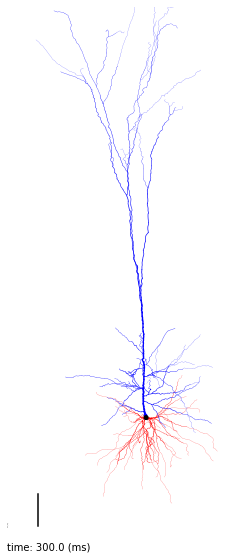

In [3]:

analyser = Analyzer(type='L5PC', more_conductances_protocol=resting_protocol2)

animation=analyser.dancing_morph(protocol=Ca_spike_protocol, seg_to_indicate_dict=dict(), diam_factor=0.5,
                            sec_to_change=None, ignore_sections=[], theta=-90, scale=0.25,
                            slow_down_factor=10, figsize=(10,10))
animation.ipython_display(fps=20, loop=True, autoplay=True)


In [4]:
animation.ipython_display(fps=100, loop=True, autoplay=True)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
